## GameSuccess: Desvendando Padrões para Campanhas Publicitárias

Bem-vindo ao GameSuccess, onde a ciência de dados encontra o mundo dos videogames. Como parte da equipe da loja online Ice, nosso objetivo é identificar os fatores que determinam o sucesso de um jogo. Utilizando avaliações de usuários, especialistas, gêneros, plataformas e dados históricos de vendas, estamos prontos para planejar campanhas publicitárias impactantes. Com dados que remontam a 2016, vamos explorar padrões e tendências que nos ajudarão a identificar os potenciais grandes vencedores. Prepare-se para decifrar o universo dos jogos eletrônicos e impulsionar nosso sucesso no mercado. GameSuccess está prestes a começar!

## 1.1 Inicialização

O primeiro passo da nossa análise é importar as bibliotecas que serão utilizadas. 

In [48]:
import pandas as pd
import matplotlib as plot
import statistics
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math
from scipy import stats as st #carregando todas as bibliotecas

## 1.2 Carregar dados

Em seguida precisamos carregar o arquivo que armazena os dados a serem análisados. 

In [49]:
data = pd.read_csv(r'C:\Users\PC\Desktop\Explorando a Ciência dos Jogos Eletrônicos\games.csv') # armazenando os dados na variável data

## 1.3 Observação dos dados. 

Agora é o momento de ter o nosso primeiro contato com os dados. Vamos identificar quais dados estão disponíveis, bem como possíveis problemas que possam estar presentes, como a ausência de informações, dados armazenados com o tipo incorreto, entre outros.

In [50]:
data.head(10)#imprimindo as primeiras 10 linhas do DataFrame

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [51]:
data.info()#imprimindo as informações gerais do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



* Name = Nome do jogo 
* PLatForm = Qual console ele foi comercializado
* Year_of_Release = Ano de lançamento 
* Genre = Genêro 
* NA_sales = Vendas Norte-Americanas 
* EU_sales = Vendas na Europa 
* JP_sales = Vendas no Japão 
* Other_sales = Vendas no restante do mundo 
* Critic_Score = Pontução da crítica especializada 
* User_Score = Pontução dos usuários
* Rating = Classificação indicativa 

Conclusão 

* Todas as colunas estão em letras maiúsculas, o que precisa ser corrigido para seguir um padrão de formatação consistente.
* A coluna "Name" apresenta dois valores ausentes, o que indica a falta de informações sobre o nome de dois jogos.
* A coluna "Year_of_Release" contém vários valores ausentes. Além disso, é possível considerar a alteração do tipo de dado para "int" ou "datetime" a fim de melhor representar o ano de lançamento dos jogos.
* A coluna "Genre" também possui valores ausentes, indicando a falta de informações sobre o gênero de alguns jogos.
* A coluna "User_Score" precisa ter seu tipo de dado alterado para "float" para facilitar análises e comparações numéricas.
* A coluna "Rating" possui valores ausentes, sugerindo que esses jogos podem ter uma classificação livre ou a informação não foi registrada corretamente.

Essas observações e conclusões fornecem um ponto de partida para a limpeza e transformação dos dados, a fim de garantir sua consistência e qualidade para análises futuras.

## 2.1  Pré processamento de dados.

O pré-processamento de dados é o conjunto de técnicas e etapas aplicadas para preparar e limpar os dados brutos, garantindo que estejam prontos para análises posteriores. Isso envolve a remoção de ruídos, tratamento de valores ausentes, normalização e outras transformações necessárias para obter dados de qualidade. 

In [52]:
data.columns = data.columns.str.lower() #trasnformando todos os nomes de colunas em letras minúsculas

In [53]:
data['name'] = data['name'].fillna('unknown')# preenchendo valores ausentes em name com: "desconhecido"

In [54]:
data['year_of_release'] = data['year_of_release'].fillna(0) #preenchendo os valores ausentes na colona year of release com: 0
data['year_of_release'] = data['year_of_release'].astype(int) # alterando o tipo de dado da coluna year of release para int

In [55]:
data['genre'] = data['genre'].fillna('unknown')# preenchendo valores ausentes em genre com: "desconhecido"

In [56]:
data['user_score']=data['user_score'].replace('tbd', np.nan) #transformando o valor "tbd" em NaN
data['user_score'] = data['user_score'].astype(float)# alterando o tipo de dado da coluna user_score para float

In [57]:
data['rating'] = data['rating'].fillna('free')# preenchendo valores ausentes em rating com: "livre"

## 2.2 Enriquecendo dados. 

Enriquecimento de dados é o processo de adicionar informações relevantes e complementares a conjuntos de dados existentes, a fim de obter uma visão mais completa e valiosa dos dados disponíveis.

In [58]:
data['all_sales'] = data['eu_sales'] + data['na_sales'] + data['jp_sales']#calculando o total de vendas de cada jogo.


## 2.3 Conclusão

* Agora todas as colunas possuem exclusivamente letras minúsculas.
* Jogos que não tinham nomes foram preenchidos com "desconhecido".
* A coluna "year_of_release" teve seus valores ausentes preenchidos com 0 e seu tipo de dado foi alterado para inteiro (int).
* A coluna "genre" teve seus valores ausentes preenchidos com "desconhecido".
* A coluna "user_score" teve o valor "tbd" substituído por NaN (valor nulo) e seu tipo foi alterado para float.
* A coluna "rating" teve seus valores ausentes substituídos por 'free'.
* Nenhum dado foi excluído com o intuito de preservar ao máximo a originalidade do conjunto de dados.

## 3.1 A análise exploratória de dados.

A análise exploratória de dados é uma abordagem inicial para entender e resumir informações importantes em um conjunto de dados. Por meio de técnicas estatísticas e visualizações, ela ajuda a identificar padrões, tendências e insights preliminares, permitindo tomar decisões informadas.

## 3.2 Quantos jogos foram lançados em anos diferentes ? Os dados de cada período são significativos?

Text(0.5, 1.0, 'lançamentos de jogos por ano')

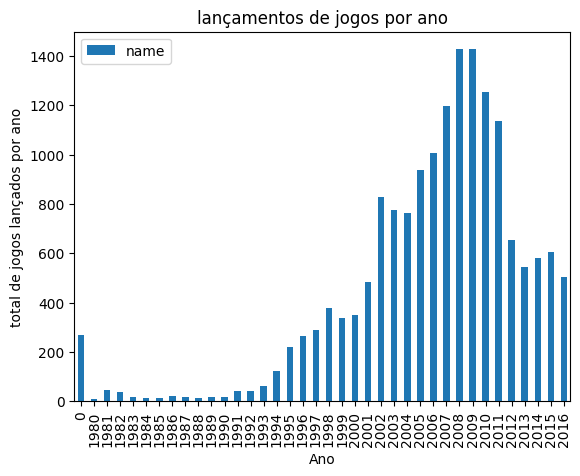

In [59]:
pivot_games_year= data.pivot_table(index='year_of_release', values='name', aggfunc='count') #criando uma tabela dinâmica para saber quantos jogos são lançados por ano 
pivot_games_year.plot(kind='bar') #plotando um gráfico de barras dessa tabela 
plt.ylabel('total de jogos lançados por ano')# definindo título do eixo y 
plt.xlabel('Ano')# definindo título do eixo x 
plt.title('lançamentos de jogos por ano') #definindo título gráfico 

* Existe um crescimento exponencial no número de jogos lançados a partir de 2002, indicando uma forte popularização dos videogames em todo o mundo. No entanto, esse crescimento diminuiu após 2009.

## 3.3 Quais plataformas tem as maiores vendas globais ? 

Text(0, 0.5, 'Vendas (em milhões)')

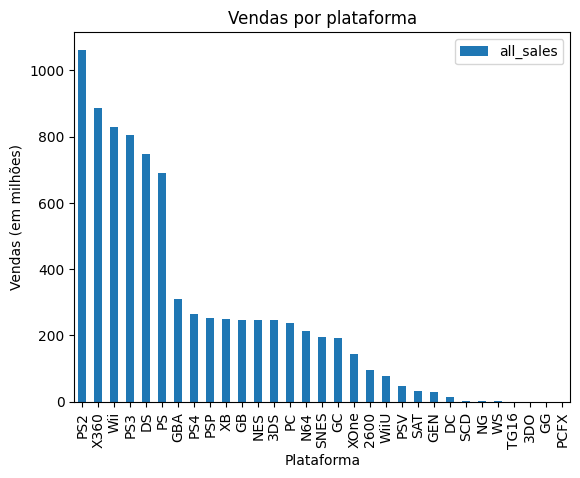

In [60]:
pivot_sales_platform= data.pivot_table(index='platform', values= 'all_sales', 
                                  aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas de cada plataforma.
pivot_sales_platform = pivot_sales_platform.sort_values(by='all_sales', ascending=False)# organizando a tabela dinâmica em ordem decrescente
pivot_sales_platform.plot(kind='bar') #plotando um gráfico de barras dessa tabela 
plt.title('Vendas por plataforma')#definindo título gráfico 
plt.xlabel('Plataforma')# definindo título do eixo x
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y


* Entre a grande variedade de consoles disponíveis, identificamos que apenas 6 concorrentes dominam as vendas: PS2, X360, Wii, PS3, DS e PS.

## 3.4 Qual a distribuição de vendas dos principais consoles ao longo dos anos ? 

,all_sales
count,13.000000
mean,81.717692
std,70.407752
min,0.350000
25%,19.240000
50%,52.300000
75%,149.650000
max,183.660000


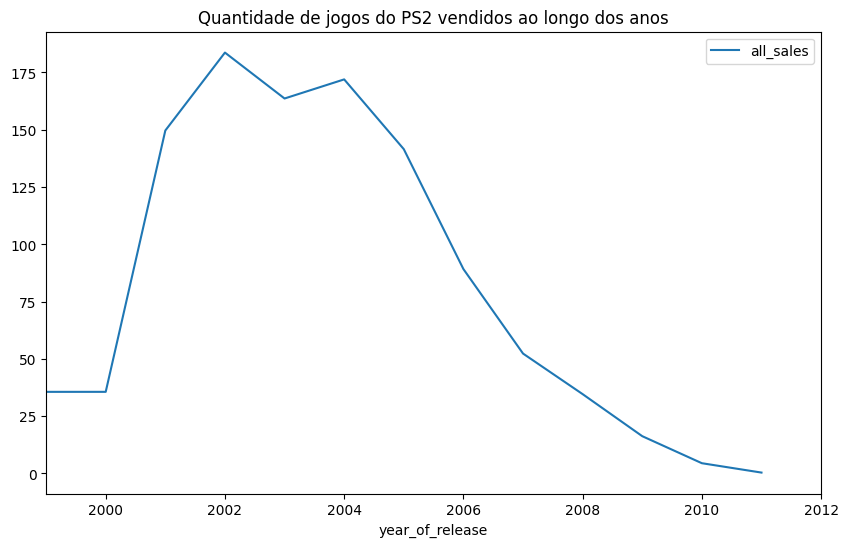

In [61]:
pivot_platform_sales = data[data['platform']=='PS2'].pivot_table(index=['year_of_release'], 
                                values='all_sales', aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas do ps2 em cada ano 
pivot_platform_sales.plot(kind='line', figsize=(10,6))#plotando um gráfico de linhas dessa tabela 
plt.xlim(1999, 2012)# definindo os limites do eixo x 
plt.title('Quantidade de jogos do PS2 vendidos ao longo dos anos')#plotando título do gráfico 
pivot_platform_sales.describe()#imprimindo uma descrição dos dados.


* O PS2 Possuí uma venda média anual de 81.7 milhões de jogos vendidos por ano, seu lançamento foi no ano 2000 com o pico das vendas em 2002, após isso suas vendas caem até 350 mil unidades no ano de 2011, não existem dados de vendas depois disso. 
* Tempo total de vida: 11 anos.


,all_sales
count,13.000000
mean,68.127692
std,53.216486
min,1.400000
25%,10.860000
50%,80.820000
75%,109.260000
max,155.800000


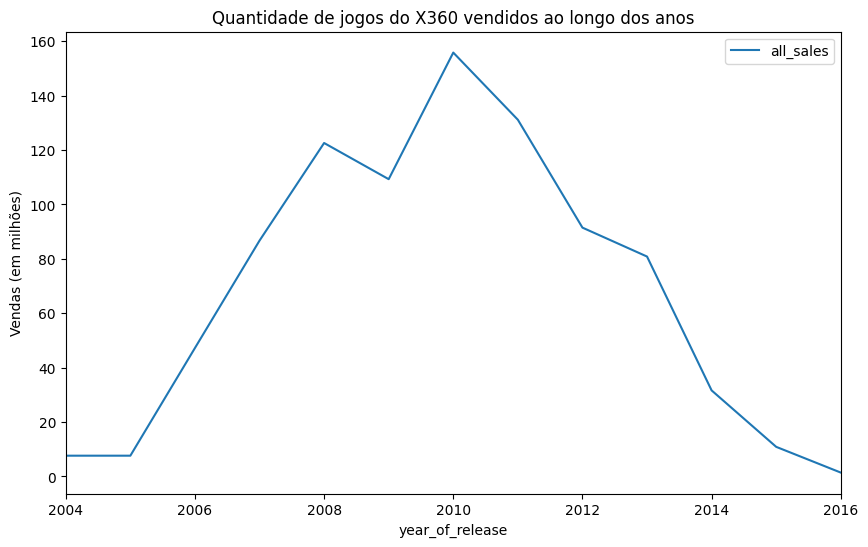

In [62]:
pivot_platform_sales = data[data['platform']=='X360'].pivot_table(index=['year_of_release'], 
                                values='all_sales', aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas de determinada plataforma.
pivot_platform_sales.plot(kind='line', figsize=(10,6), legend='Vendas')#plotando um gráfico de linhas dessa tabela 
plt.xlim(2004, 2016)# definindo os limites do eixo x 
plt.legend()#plotando título do gráfico
plt.title('Quantidade de jogos do X360 vendidos ao longo dos anos')
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y
pivot_platform_sales.describe()#imprimindo uma descrição dos dados.

* O X360 Possuí uma venda média anual de 68. milhões de jogos vendidos por ano, seu lançamento foi no ano 2005 com o pico das vendas em 2008, após isso suas vendas caem até 1.4 milhões unidades no ano de 2016, não existem dados de vendas depois disso. 
* Tempo total de vida: 11 anos.

,all_sales
count,12.000000
mean,69.036667
std,70.916733
min,0.170000
25%,6.765000
50%,37.295000
75%,127.527500
max,189.430000


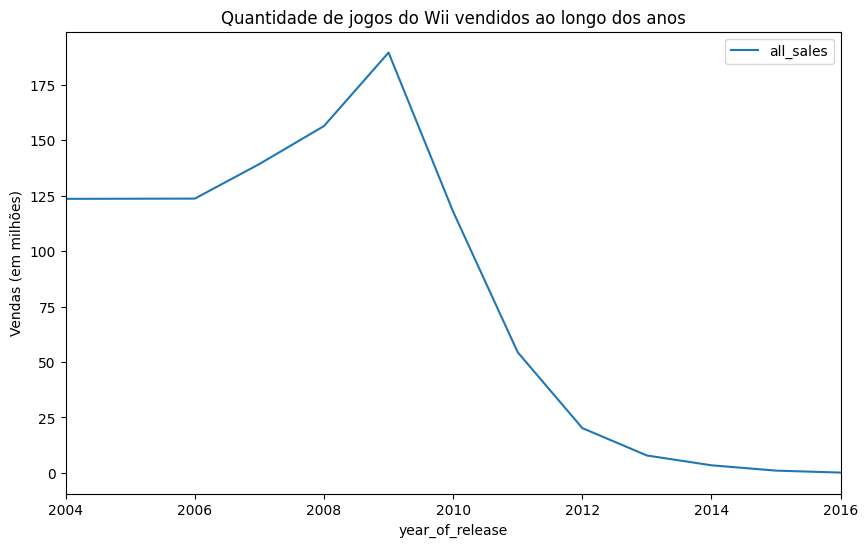

In [63]:
pivot_platform_sales = data[data['platform']=='Wii'].pivot_table(index=['year_of_release'],
                                 values='all_sales', aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas de determinada plataforma.
pivot_platform_sales.plot(kind='line', figsize=(10,6), legend='Vendas')#plotando um gráfico de linhas dessa tabela 
plt.xlim(2004, 2016)# definindo os limites do eixo x 
plt.legend()#plotando título do gráfico
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y
plt.title('Quantidade de jogos do Wii vendidos ao longo dos anos')#definindo um título para o gráfico.
pivot_platform_sales.describe()#imprimindo uma descrição dos dados.

* O Wii Possuí uma venda média anual de 69 milhões de jogos vendidos por ano, seu lançamento foi no ano 2006 com o pico das vendas em 2009, após isso suas vendas caem até 170 mil unidades no ano de 2016, não existem dados de vendas depois disso. 
* Tempo total de vida: 10 anos.

,all_sales
count,12.000000
mean,66.997500
std,48.516556
min,3.230000
25%,16.650000
50%,76.675000
75%,104.605000
max,135.220000


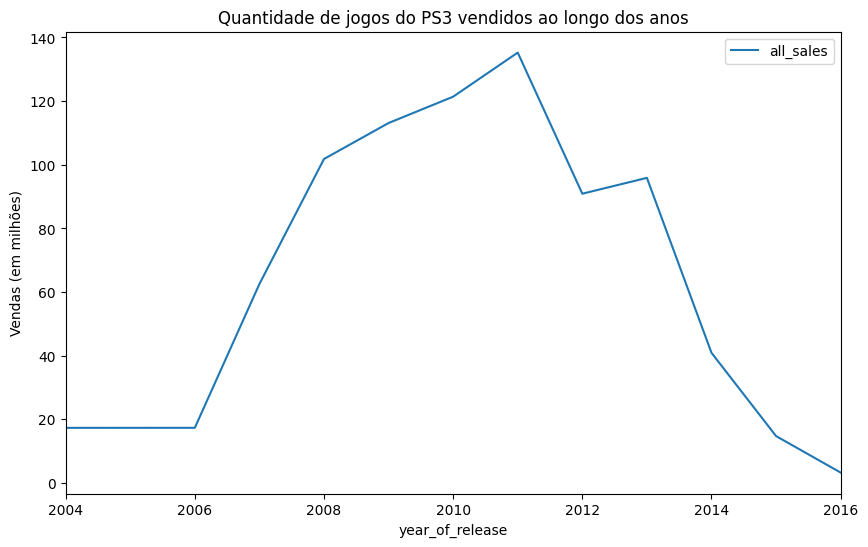

In [64]:
pivot_platform_sales = data[data['platform']=='PS3'].pivot_table(index=['year_of_release'], 
                                values='all_sales', aggfunc='sum') #criando uma tabela dinâmica para saber o total de vendas de determinada plataforma.
pivot_platform_sales.plot(kind='line', figsize=(10,6), legend='Vendas')#plotando um gráfico de linhas dessa tabela 
plt.xlim(2004, 2016)# definindo os limites do eixo x 
plt.legend()#plotando título do gráfico
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y
plt.title('Quantidade de jogos do PS3 vendidos ao longo dos anos')
pivot_platform_sales.describe()#imprimindo uma descrição dos dados.

* O PS3 Possuí uma venda média anual de 66.9 milhões de jogos vendidos por ano, seu lançamento foi no ano 2006 com o pico das vendas em 2011, após isso suas vendas caem até 3.2 milhões unidades no ano de 2016, não existem dados de vendas depois disso. 
* Tempo total de vida: 10 anos.

,all_sales
count,12.000000
mean,62.238333
std,57.471352
min,0.020000
25%,8.595000
50%,51.890000
75%,113.565000
max,135.850000


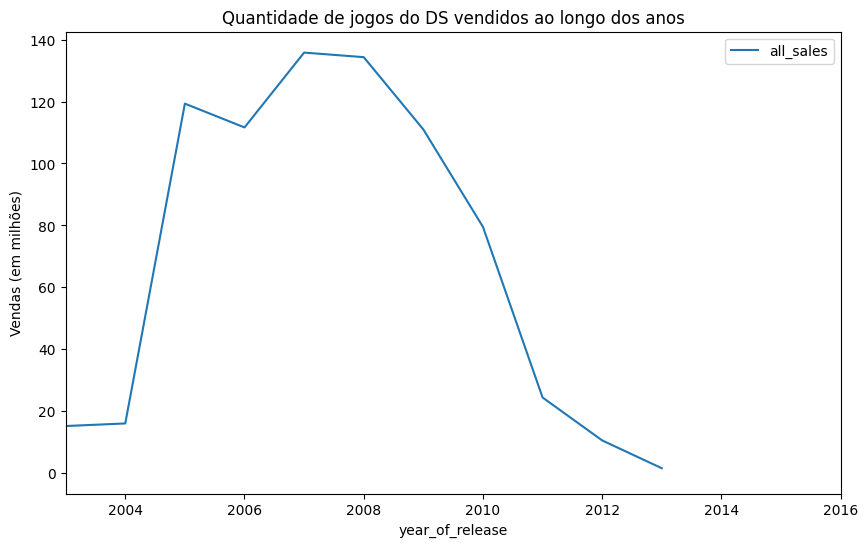

In [65]:
pivot_platform_sales = data[data['platform']=='DS'].pivot_table(index=['year_of_release'], 
                                values='all_sales', aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas de determinada plataforma.
pivot_platform_sales.plot(kind='line', figsize=(10,6), legend='Vendas')#plotando um gráfico de linhas dessa tabela 
plt.xlim(2003, 2016)# definindo os limites do eixo x 
plt.legend()#plotando título do gráfico
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y
plt.title('Quantidade de jogos do DS vendidos ao longo dos anos')
pivot_platform_sales.describe()#imprimindo uma descrição dos dados.

* O DS Possuí uma venda média anual de 62.2 milhões de jogos vendidos por ano, seu lançamento foi no ano 2004 com o pico das vendas em 2007, após isso suas vendas caem até 20 mil unidades no ano de 2013, não existem dados de vendas depois disso. 
* Tempo total de vida: 9 anos.

,all_sales
count,11.000000
mean,62.722727
std,60.160636
min,1.930000
25%,5.970000
50%,34.000000
75%,109.695000
max,160.440000


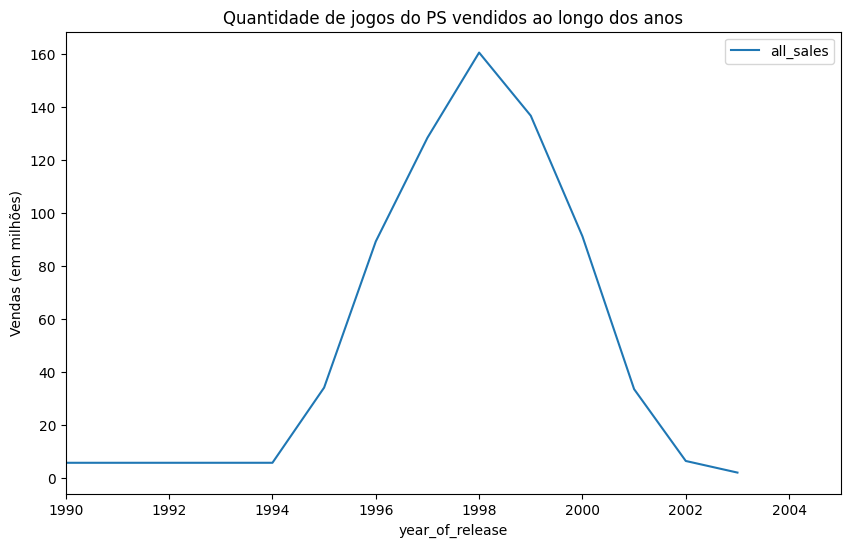

In [66]:
pivot_platform_sales = data[data['platform']=='PS'].pivot_table(index=['year_of_release'], 
                                values='all_sales', aggfunc='sum') #criando uma tabela dinâmica para saber o total de vendas de determinada plataforma.
pivot_platform_sales.plot(kind='line', figsize=(10,6), legend='Vendas')#plotando um gráfico de linhas dessa tabela 
plt.xlim(1990, 2005)# definindo os limites do eixo x 
plt.legend()#plotando título do gráfico
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y
plt.title('Quantidade de jogos do PS vendidos ao longo dos anos')#definindo um título para o gráfico.
pivot_platform_sales.describe()#imprimindo uma descrição dos dados.

* O PS Possuí uma venda média anual de 62.7 milhões de jogos vendidos por ano, seu lançamento foi no ano 1994 com o pico das vendas em 1998, após isso suas vendas caem até 1.9 milhões unidades no ano de 2003, não existem dados de vendas depois disso. 
* Tempo total de vida: 9 anos.

Conclusões Parciais 

* Os 6 principais concorrentes de mercado têm uma duração média de vida é 10 anos, sendo que a maioria deles atinge seu pico de vendas no o 3º, seguido por uma queda nas vendas.

## 3.5 Qual o período de dados utilizar para construir um modelo para 2017 ?

* É comum que os videogames sejam lançados em gerações, seguidas pela maior parte da indústria. Portanto, para nossa análise, iremos selecionar os dados da tabela a partir do lançamento da última geração.

* Com base em nossa análise, precisamos determinar qual é a melhor plataforma para o ano de 2017. Para isso, iremos analisar os gráficos de vendas das 6 principais plataformas a partir do ano de 2013.

In [67]:
data_clean = data[data['year_of_release']>2012] #criando um novo dataframe somente com os dados após 2012.

## 3.6 Quais plataformas lideram as vendas depois de 2012 ? 

Text(0, 0.5, 'Vendas (em milhões)')

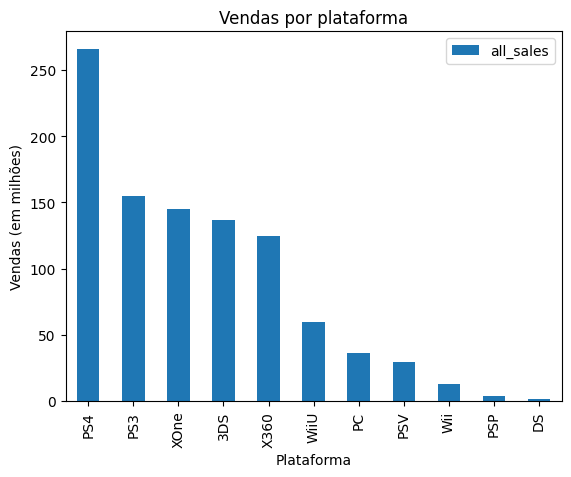

In [68]:
pivot_sales_platform= data_clean.pivot_table(index='platform', values= 'all_sales', 
                                  aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas de determinada plataforma.
pivot_sales_platform = pivot_sales_platform.sort_values(by='all_sales', ascending=False)# organizando a tabela dinâmica em ordem decrescente
pivot_sales_platform.plot(kind='bar') #plotando um gráfico de barras dessa tabela 
plt.title('Vendas por plataforma')#definindo título gráfico 
plt.xlabel('Plataforma')# definindo título do eixo x
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y

* Após o ano de 2012, novos concorrentes ingressaram no mercado de jogos ao redor do mundo, trazendo uma disposição diferente daquela analisada anteriormente. Os novos líderes de mercado são: PS4, PS3, XOne, 3DS, X360, WiiU


## 3.7 Quais plataformas atuais estão em crescimento e quais estão em queda ?  

,all_sales
count,4.000000
mean,66.447500
std,34.115468
min,22.120000
25%,49.787500
50%,71.615000
75%,88.275000
max,100.440000


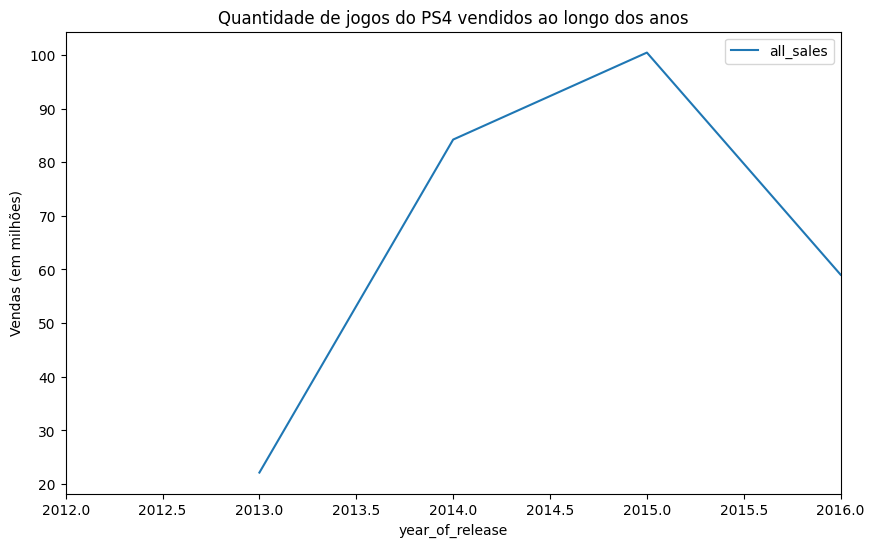

In [69]:
pivot_platform_sales = data[data['platform']=='PS4'].pivot_table(index=['year_of_release'], 
                                values='all_sales', aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas do ps2 em cada ano 
pivot_platform_sales.plot(kind='line', figsize=(10,6))#plotando um gráfico de linhas dessa tabela 
plt.xlim(2012, 2016)# definindo os limites do eixo x 
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y
plt.title('Quantidade de jogos do PS4 vendidos ao longo dos anos')#plotando título do gráfico 
pivot_platform_sales.describe()#imprimindo uma descrição dos dados.

* O PS4 Possuí uma venda média anual de 66.7 milhões de jogos vendidos por ano, seu lançamento foi no ano 2013 com o pico das vendas em 2015,  
* status atual: queda no número de vendas 

,all_sales
count,12.000000
mean,66.997500
std,48.516556
min,3.230000
25%,16.650000
50%,76.675000
75%,104.605000
max,135.220000


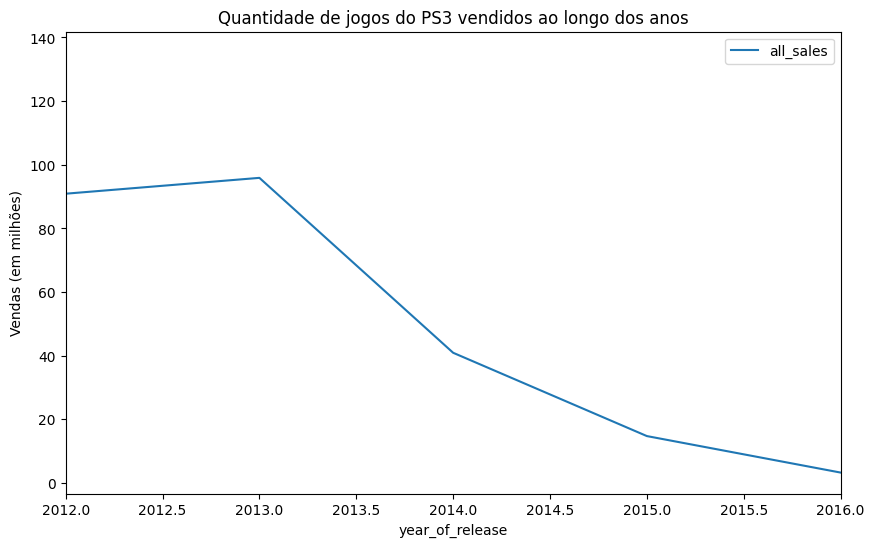

In [70]:
pivot_platform_sales = data[data['platform']=='PS3'].pivot_table(index=['year_of_release'], 
                                values='all_sales', aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas do ps2 em cada ano 
pivot_platform_sales.plot(kind='line', figsize=(10,6))#plotando um gráfico de linhas dessa tabela 
plt.xlim(2012, 2016)# definindo os limites do eixo x 
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y
plt.title('Quantidade de jogos do PS3 vendidos ao longo dos anos')#plotando título do gráfico 
pivot_platform_sales.describe()#imprimindo uma descrição dos dados.

* O PS3 foi lançado anteriormente ao ano de 2012 e mesmo assim ainda disputa mercado com as novas gerações de videogame, sendo o segundo com mais vendas no recorte atual.  
* status atual: queda no número de vendas. 

,all_sales
count,4.000000
mean,36.262500
std,18.469372
min,17.210000
25%,22.235000
50%,36.585000
75%,50.612500
max,54.670000


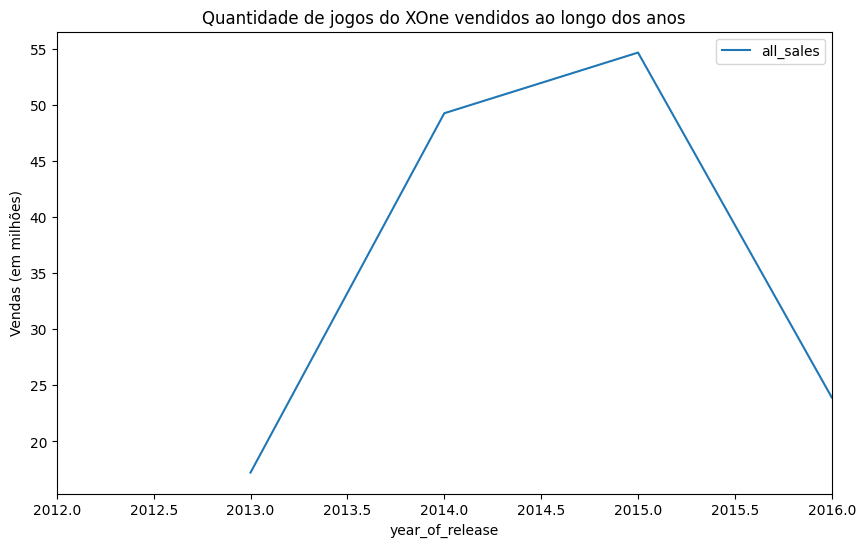

In [71]:
pivot_platform_sales = data[data['platform']=='XOne'].pivot_table(index=['year_of_release'], 
                                values='all_sales', aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas do ps2 em cada ano 
pivot_platform_sales.plot(kind='line', figsize=(10,6))#plotando um gráfico de linhas dessa tabela 
plt.xlim(2012, 2016)# definindo os limites do eixo x 
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y
plt.title('Quantidade de jogos do XOne vendidos ao longo dos anos')#plotando título do gráfico 
pivot_platform_sales.describe()#imprimindo uma descrição dos dados.

* O XOne Possuí uma venda média anual de 36.2 milhões de jogos vendidos por ano, seu lançamento foi no ano 2013 com o pico das vendas em 2015,  
* status atual: queda no número de vendas 

,all_sales
count,7.000000
mean,35.091429
std,21.598381
min,1.100000
25%,20.625000
50%,41.750000
75%,51.370000
max,58.800000


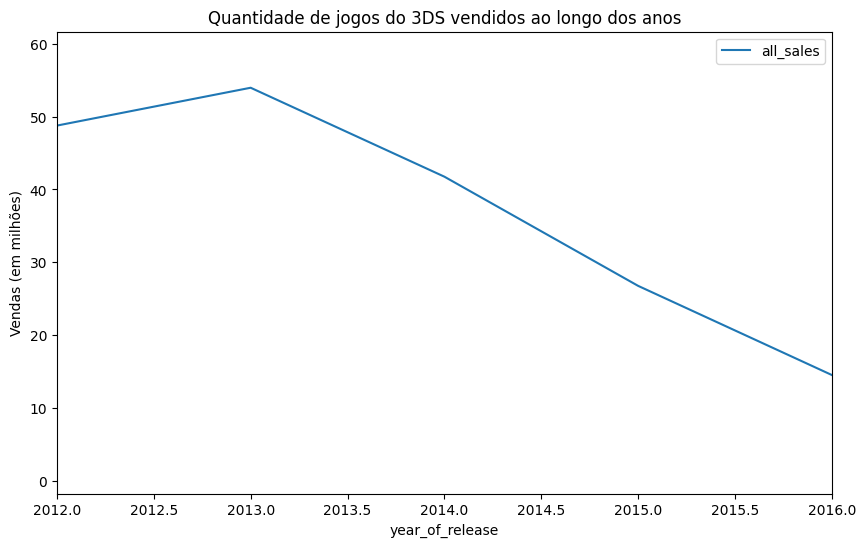

In [72]:
pivot_platform_sales = data[data['platform']=='3DS'].pivot_table(index=['year_of_release'], 
                                values='all_sales', aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas do ps2 em cada ano 
pivot_platform_sales.plot(kind='line', figsize=(10,6))#plotando um gráfico de linhas dessa tabela 
plt.xlim(2012, 2016)# definindo os limites do eixo x 
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y
plt.title('Quantidade de jogos do 3DS vendidos ao longo dos anos')#plotando título do gráfico 
pivot_platform_sales.describe()#imprimindo uma descrição dos dados.

* O 3DS foi lançado anteriormente ao ano de 2012 e mesmo assim ainda disputa mercado com as novas gerações de videogame, sendo o quarto com mais vendas no recorte atual.  
* status atual: queda no número de vendas. 

,all_sales
count,13.000000
mean,68.127692
std,53.216486
min,1.400000
25%,10.860000
50%,80.820000
75%,109.260000
max,155.800000


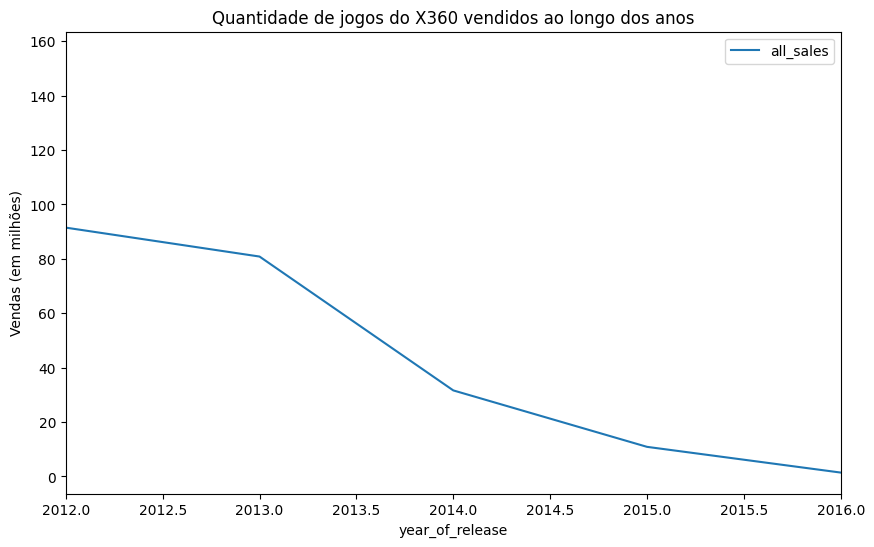

In [73]:
pivot_platform_sales = data[data['platform']=='X360'].pivot_table(index=['year_of_release'], 
                                values='all_sales', aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas do ps2 em cada ano 
pivot_platform_sales.plot(kind='line', figsize=(10,6))#plotando um gráfico de linhas dessa tabela 
plt.xlim(2012, 2016)# definindo os limites do eixo x 
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y
plt.title('Quantidade de jogos do X360 vendidos ao longo dos anos')#plotando título do gráfico 
pivot_platform_sales.describe()#imprimindo uma descrição dos dados.

* O X360 foi lançado anteriormente ao ano de 2012 e mesmo assim ainda disputa mercado com as novas gerações de videogame, sendo o quinto com mais vendas no recorte atual.  
* status atual: queda no número de vendas. 

,all_sales
count,5.000000
mean,15.248000
std,6.554202
min,4.250000
25%,15.220000
50%,16.300000
75%,20.120000
max,20.350000


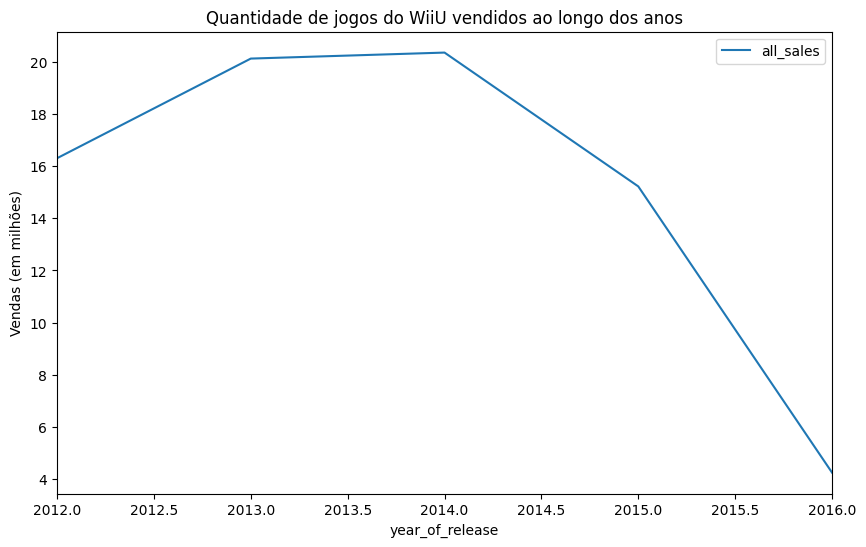

In [74]:
pivot_platform_sales = data[data['platform']=='WiiU'].pivot_table(index=['year_of_release'], 
                                values='all_sales', aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas do ps2 em cada ano 
pivot_platform_sales.plot(kind='line', figsize=(10,6))#plotando um gráfico de linhas dessa tabela 
plt.xlim(2012, 2016)# definindo os limites do eixo x 
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y
plt.title('Quantidade de jogos do WiiU vendidos ao longo dos anos')#plotando título do gráfico 
pivot_platform_sales.describe()#impriminfo uma descrição dos dados.

* O WiiU foi lançado anteriormente ao ano de 2012 e mesmo assim ainda disputa mercado com as novas gerações de videogame, sendo o segundo com mais vendas no recorte atual.  
* status atual: queda no número de vendas. 

Conclusões parciais 

* As marcas Playstation e Xbox dominam o mercado, com mais de uma geração de seus consoles entre os cinco mais vendidos globalmente.
* Em 2016, o PS4 liderou o mercado de venda de jogos, apesar da queda nas vendas gerais de todos os consoles.

## 3.8 As vendas globais dos jogos são alteradas pela plataforma em que são comercializadas ? 

Text(0, 0.5, 'Vendas (em milhões)')

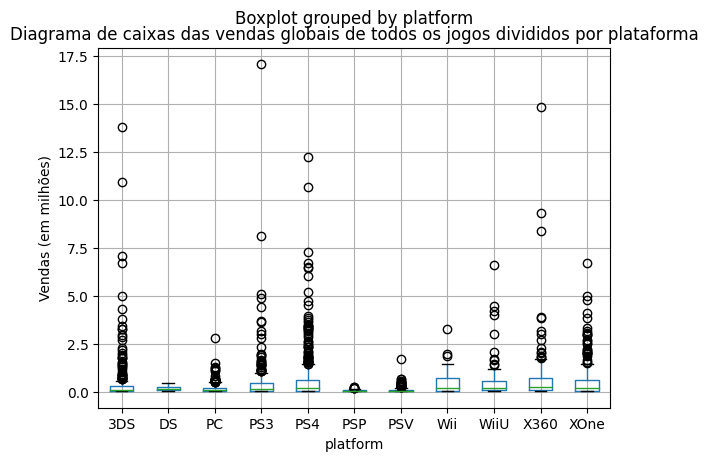

In [75]:
data_clean.boxplot('all_sales', by="platform")#criando um diagrama de caixa das vendas por plataforma 
plt.title('Diagrama de caixas das vendas globais de todos os jogos divididos por plataforma')#plontando o título do diagrama
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y

## 3.9 Como as avaliações afetam as vendas em uma plataforma ?

* Vamos estudar os impactos das avaliações nas vendas do PS4, para isso vamos plotar um gráfico de corelação entre as avalições e as vendas.  

Text(0.5, 1.0, 'Relação entre Avaliações e Vendas')

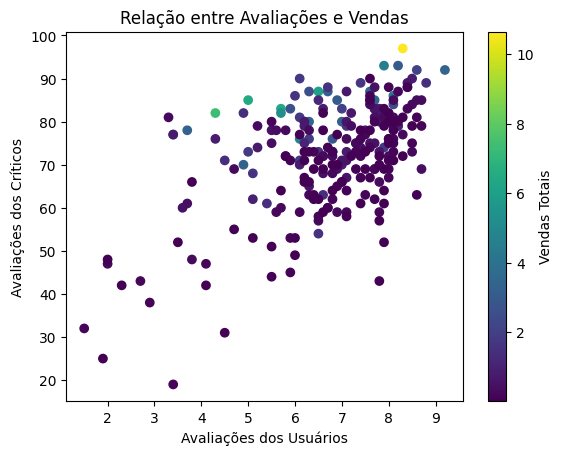

In [76]:
data_platform = data_clean[data_clean['platform'] == 'PS4']
plt.scatter(data_platform['user_score'], data_platform['critic_score'], 
            c=data_platform['all_sales'], cmap='viridis')#plotando um grafico de corelação entre as avaliações dos críticos, usarios e vendas.
plt.colorbar(label='Vendas Totais')#criando uma barra para visualização
plt.xlabel('Avaliações dos Usuários')# definindo título do eixo x
plt.ylabel('Avaliações dos Críticos')# definindo título do eixo y
plt.title('Relação entre Avaliações e Vendas')# definindo título do gráfico



* Existe um alto grau de correlação entre as avalições positivas tanto do público quanto da crítica no número de vendas do PS4. 

Text(0, 0.5, 'Vendas (em milhões)')

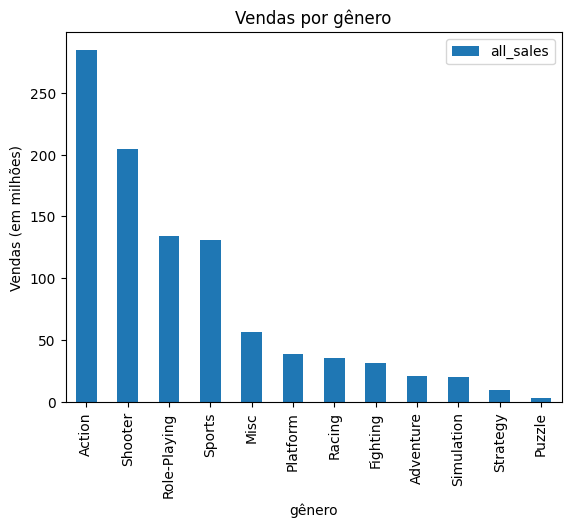

In [77]:
pivot_genre= data_clean.pivot_table(index='genre', values= 'all_sales', 
                    aggfunc='sum')#criando uma tabela dinâmica para saber o total de vendas de determinada plataforma.
pivot_genre = pivot_genre.sort_values(by='all_sales', ascending=False)# organizando a tabela dinâmica em ordem decrescente
pivot_genre.plot(kind='bar') #plotando um gráfico de barras dessa tabela 
plt.title('Vendas por gênero')#definindo título gráfico 
plt.xlabel('gênero')# definindo título do eixo x
plt.ylabel('Vendas (em milhões)')# definindo título do eixo y

3.10 Conclusão
 
* Existe uma forte correlação entre as avaliações dos usuários e dos críticos, o que também reflete nas vendas dos jogos.
* O gênero de jogo mais lucrativo é Ação.

## 4.1 Criando perfis de clientes para cada continente.

Vamos analisar cada região (América do Norte, Europa e Japão) para identificar as cinco principais plataformas em termos de vendas e as variações de suas quotas de mercado entre as regiões. Também vamos investigar os cinco principais gêneros de jogos e explorar as diferenças entre eles. Além disso, examinaremos se as classificações do ESRB têm impacto nas vendas em regiões específicas.

## 4.2 Quais são as 5 principais plataformas de cada região ?

Text(0.5, 1.0, 'Percentual de vendas das 5 maiores plataformas na Europa')

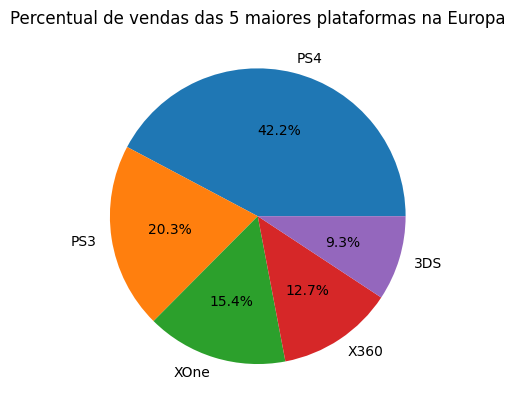

In [78]:
pivot_region= pd.pivot_table(data_clean, values='eu_sales', index='platform',
                aggfunc='sum') #criando um tablea dinâmica para visualizar as vendas de cada plataforma na europa.
pivot_region = pivot_region.sum(axis=1).sort_values(ascending=False) #organizando em ordem decrescente. 
pivot_region = pivot_region.head() #selecionando somente as 5 principais plataformas da região.
pivot_region = (pivot_region / pivot_region.sum()) * 100 #calculando o percentual de cada plataforma. 
plt.pie(pivot_region, labels=pivot_region.index, autopct='%1.1f%%')#plotando um gráfico de pizza. 
plt.title("Percentual de vendas das 5 maiores plataformas na Europa")#plotando o título.


* É interessante observar que o PS4 possui uma liderança significativa nas vendas na Europa, com mais de 42% de quota de mercado. Essa é uma participação de mercado considerável, indicando uma preferência dos consumidores europeus pela plataforma.

Text(0.5, 1.0, 'Percentual de vendas das 5 maiores plataformas na America do Norte')

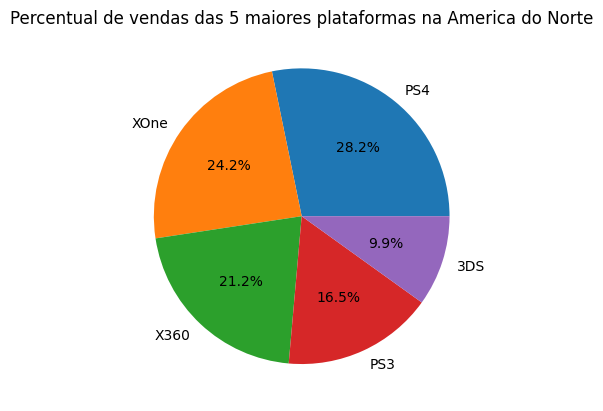

In [79]:
pivot_region= pd.pivot_table(data_clean, values='na_sales', index='platform',
                aggfunc='sum') #criando um tablea dinâmica para visualizar as vendas de cada plataforma na america do norte.
pivot_region = pivot_region.sum(axis=1).sort_values(ascending=False) #organizando em ordem decrescente. 
pivot_region = pivot_region.head() #selecionando somente as 5 principais plataformas da região.
pivot_region = (pivot_region / pivot_region.sum()) * 100 #calculando o percentual de cada plataforma. 
plt.pie(pivot_region, labels=pivot_region.index, autopct='%1.1f%%')#plotando um gráfico de pizza. 
plt.title("Percentual de vendas das 5 maiores plataformas na America do Norte")#plotando o título.

* Na América do Norte, o PS4 também está à frente, com uma quota de mercado de 28%, seguido de perto pelo XOne com 24%. Esses números refletem a preferência dos consumidores nessas regiões e destacam a competição entre os consoles.

Text(0.5, 1.0, 'Percentual de vendas das 5 maiores plataformas no Japão')

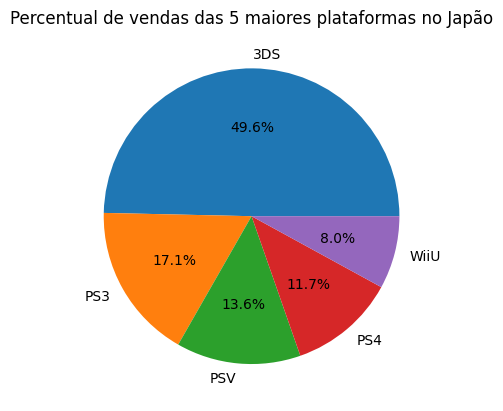

In [80]:
pivot_region= pd.pivot_table(data_clean, values='jp_sales', index='platform',
                aggfunc='sum') #criando um tablea dinâmica para visualizar as vendas de cada plataforma no Japão.
pivot_region = pivot_region.sum(axis=1).sort_values(ascending=False) #organizando em ordem decrescente. 
pivot_region = pivot_region.head() #selecionando somente as 5 principais plataformas da região.
pivot_region = (pivot_region / pivot_region.sum()) * 100 #calculando o percentual de cada plataforma. 
plt.pie(pivot_region, labels=pivot_region.index, autopct='%1.1f%%')#plotando um gráfico de pizza. 
plt.title("Percentual de vendas das 5 maiores plataformas no Japão")#plotando o título.

No Japão, ocorre uma inversão surpreendente no que diz respeito à liderança entre os concorrentes de consoles. Enquanto o 3DS assume uma posição de absoluto destaque, sendo o líder incontestável em vendas, o PlayStation 4, que lidera em outros mercados, ocupa apenas a quarta posição no país.

## 4.3 Quais são os 5 principais gêneros em cada região ? 

Vamos analisar os cinco principais gêneros de videogames em cada região.

Text(0.5, 1.0, 'Percentual de vendas das 5 maiores plataformas no Europa')

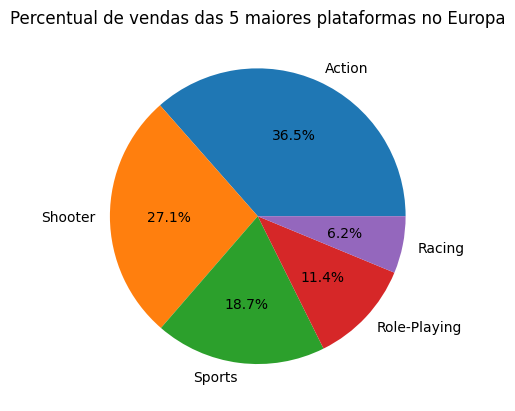

In [81]:
pivot_region= pd.pivot_table(data_clean, values='eu_sales', index='genre',
                aggfunc='sum') #criando um tablea dinâmica para visualizar as vendas de cada genêro no europa.
pivot_region = pivot_region.sum(axis=1).sort_values(ascending=False) #organizando em ordem decrescente. 
pivot_region = pivot_region.head() #selecionando somente as 5 principais plataformas da região.
pivot_region = (pivot_region / pivot_region.sum()) * 100 #calculando o percentual de cada plataforma. 
plt.pie(pivot_region, labels=pivot_region.index, autopct='%1.1f%%')#plotando um gráfico de pizza. 
plt.title("Percentual de vendas das 5 maiores plataformas no Europa")#plotando o título.

Na Europa, o gênero de jogo mais popular é a ação, liderando o mercado com 36,5% das vendas. Em segundo lugar, temos os jogos de tiro (shooter), que representam 27,1% das vendas. Os jogos de esportes também têm uma participação significativa, seguidos pelos jogos de RPG (role-playing game) e jogos de corrida. Esses são os cinco principais gêneros de jogos na Europa.

Text(0.5, 1.0, 'Percentual de vendas das 5 maiores plataformas na America do Norte.')

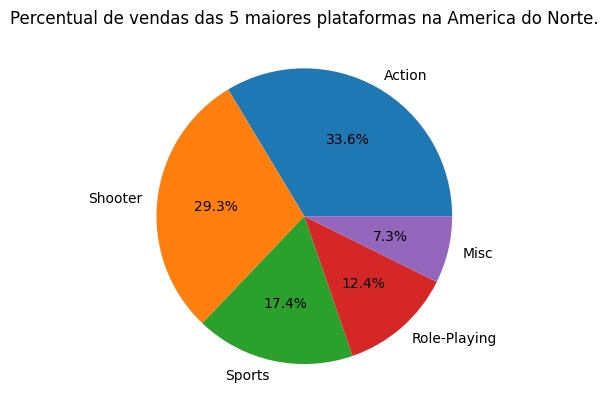

In [82]:
pivot_region= pd.pivot_table(data_clean, values='na_sales', index='genre',
                aggfunc='sum') #criando um tablea dinâmica para visualizar as vendas de cada genêro na amrica do norte.
pivot_region = pivot_region.sum(axis=1).sort_values(ascending=False) #organizando em ordem decrescente. 
pivot_region = pivot_region.head() #selecionando somente as 5 principais plataformas da região.
pivot_region = (pivot_region / pivot_region.sum()) * 100 #calculando o percentual de cada plataforma. 
plt.pie(pivot_region, labels=pivot_region.index, autopct='%1.1f%%')#plotando um gráfico de pizza. 
plt.title("Percentual de vendas das 5 maiores plataformas na America do Norte.")#plotando o título.

Na América do Norte, o gênero de jogo mais popular é a ação, que lidera o mercado com 33,6% das vendas. Em segundo lugar, temos os jogos de tiro (shooter), representando 29,3% das vendas. Os jogos de esportes também têm uma participação significativa, seguidos pelos jogos de RPG (role-playing game) e jogos miscelâneos. Esses são os cinco principais gêneros de jogos na América do Norte.

Text(0.5, 1.0, 'Percentual de vendas das 5 maiores plataformas no Japão')

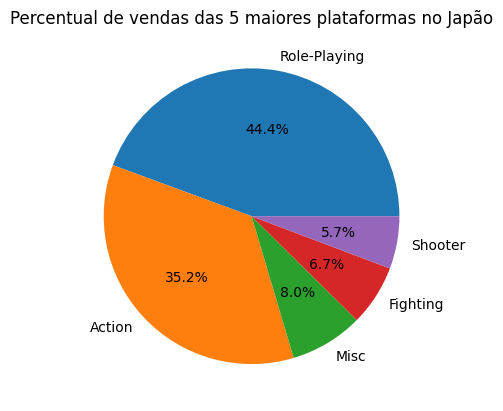

In [83]:
pivot_region= pd.pivot_table(data_clean, values='jp_sales', index='genre',
                aggfunc='sum') #criando um tablea dinâmica para visualizar as vendas de cada genêro no Japão.
pivot_region = pivot_region.sum(axis=1).sort_values(ascending=False) #organizando em ordem decrescente. 
pivot_region = pivot_region.head() #selecionando somente as 5 principais plataformas da região.
pivot_region = (pivot_region / pivot_region.sum()) * 100 #calculando o percentual de cada plataforma. 
plt.pie(pivot_region, labels=pivot_region.index, autopct='%1.1f%%')#plotando um gráfico de pizza. 
plt.title("Percentual de vendas das 5 maiores plataformas no Japão")#plotando o título.


No Japão, o gênero de jogo mais popular é o role-playing game (RPG), liderando o mercado com 44,4% das vendas. Em segundo lugar, temos os jogos de ação, com 35,2% das vendas. Em seguida, encontramos jogos miscelâneos, jogos de luta (fighting) e jogos de tiro (shooter). Esses são os cinco principais gêneros de jogos no Japão.

Conclusões

Europa:

* PlayStation 4 (PS4) lidera as vendas, com mais de 42% de quota de mercado.
* Gêneros de jogos mais populares: ação, tiro, esportes, RPG e corrida.

América do Norte:

* PlayStation 4 (PS4) lidera as vendas, com 28% de quota de mercado, seguido de perto pelo Xbox One (XOne) com 24%.
* Gêneros de jogos mais populares: ação, tiro, esportes, RPG e miscelâneos.

Japão:

* Console 3DS é o líder incontestável em vendas, enquanto o PlayStation 4 (PS4) ocupa a quarta posição.
* Gêneros de jogos mais populares: RPG, ação, miscelâneos, luta e tiro.


## 4.4 As classificações do ESRB afetam as vendas em regiões individuais?

<Axes: xlabel='rating'>

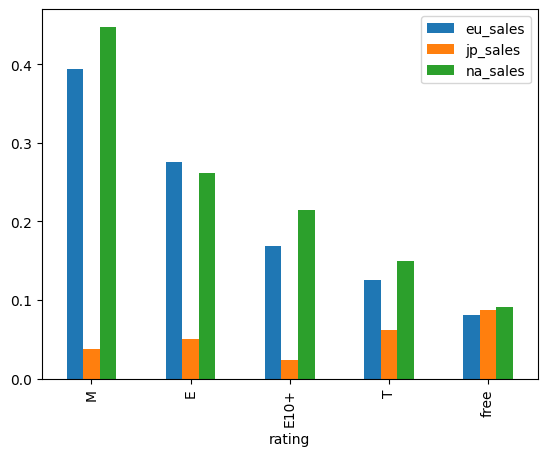

In [96]:
pivot_region = data_clean.pivot_table(index='rating', values=['eu_sales', 'na_sales', 'jp_sales'], aggfunc='mean')
pivot_region = pivot_region.sort_values(by='eu_sales', ascending=False)
pivot_region.plot(kind='bar')

## 5.1 Análise estatística de dados.
A análise estatística de dados é o processo de usar métodos estatísticos para examinar e interpretar conjuntos de dados. Isso envolve identificar padrões, tendências e relações nos dados, permitindo obter informações e insights valiosos. A análise estatística ajuda na tomada de decisões informadas e fornece uma base sólida para o entendimento de fenômenos e o suporte à pesquisa em várias áreas.

## 5.2 —Hipótese: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

Hipótese alternativa: As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.

Hipótese nula: As classificações médias dos usuários das plataformas Xbox One e PC são iguais.

In [98]:
xbox=data_clean['user_score'][data_clean['platform']=='XOne']
pc=data_clean['user_score'][data_clean['platform']=='PC']
alpha = 0.05
significancia_plat=st.ttest_ind(xbox, pc ,nan_policy='omit')
if significancia_plat.pvalue < alpha:
    print("Rejeitamos a hipótese nula, logo as populações possuem médias de notas significativamente diferentes.")
else:
    print("Nós não podemos rejeitar a hipótese nula, logo, as populações de XOne e Pc não diferem significativamente")

Nós não podemos rejeitar a hipótese nula, logo, as populações de XOne e Pc não diferem significativamente


## 5.3- Hipótese:As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Hipótese alternativa: As classificações médias de usuários para os gêneros Action e Sports são diferentes.

Hipótese nula: As classificações médias de usuários para os gêneros Action e Sports são iguais.

In [100]:
action=data_clean['user_score'][data_clean['genre']=='Action']
sports=data_clean['user_score'][data_clean['genre']=='Sports']
action=action.dropna()
sports=sports.dropna()
significancia_genre=st.ttest_ind(action, sports)
if significancia_genre.pvalue < alpha:
    print("Rejeitamos a hipótese nula, logo as populações possuem médias de avaliação significativamente diferentes entre os jogos.")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

Rejeitamos a hipótese nula, logo as populações possuem médias de avaliação significativamente diferentes entre os jogos.


## 6.1 Conclusão.

concluiu-se que, para prever o ano de 2017, os consoles mais relevantes seriam o PS4 e o XOne, enquanto os gêneros de jogo predominantes seriam ação e tiro. No entanto, é importante ressaltar que o mercado japonês funciona de forma diferente. Para essa região específica, o console mais popular seria o 3DS, e os gêneros preferidos seriam RPG e ação. Essas conclusões se baseiam nas análises anteriores.